# IN3050/IN4050 2021: Week 06 Perceptron
### Introduction
The goal of this week is to get familiar with the perceptron classifier.
We will first consider some "paper-and-pencil" exercises to get more familiar with the algorithm, before we consider an implementation.

## Part 1: Paper and Pencil

### Exercise I
You want to predict if movies will be profitable based on their screenplays. You hire two critics A and B to read a script you have and rate it on a scale of 1 to 6. The critics are not perfect; here are five data points including the critics' scores and the performance of the movie:
```
| Movie # | Alice    | Bob       | Profitable? |
|  _______|__________|___________|_____________|
|  1      | 1        | 1         |      no     |
|  _______|__________|___________|_____________|
|  2      | 4        | 3         |      yes    |
|  _______|__________|___________|_____________|
|  3      | 3        | 5         |      yes    |
|  _______|__________|___________|_____________|
|  4      | 5        | 6         |      yes    |
|  _______|__________|___________|_____________|
|  5      | 2        | 3         |      no     |
|  _______|__________|___________|_____________|
```
Is the data linearily separable? Plot the data on the 2D plane below; label profitable movies with + and non-profitable movies with x and determine if the data are linearily separable.

#### Solution
Yes

Plot by hand - fastest, or implement.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

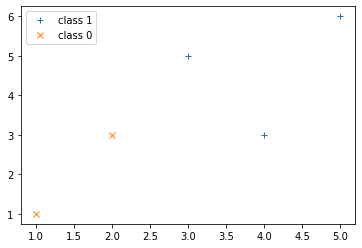

In [4]:
X4 = [(1,1), (4,3), (3,5), (5,6), (2,3)]
y4 = [0, 1, 1, 1, 0]
cl = {0:[], 1:[]}
for (a, b) in zip(X4, y4):
    cl[b].append(a)
plt.plot([a[0] for a in cl[1]], [a[1] for a in cl[1]], '+', label="class 1")
plt.plot([a[0] for a in cl[0]], [a[1] for a in cl[0]], 'x', label="class 0")
plt.legend()

#### End of solution

### Exercise II

Now you decide to use a perceptron to classify your data. Suppose you directly use the scores given above as features, together with a bias feature. That is $f_0=1$, $f_1=$ score given by A and $f_2=$ score given by B.

Run one pass through the data with the perceptron algorithm, filling out the table below. Go through the data points in order, e.g., using data point 0 at step 1. For each of the 5 steps write the current state of the weights, the score, and whether the prediction is correct.

```
| Step | Weights    | Score                   | Correct predicition? |
_______|____________|_________________________|______________________|
|  1   | (-1, 0, 0) | -1*1 + 0*1 + 0 * 1 = -1 |      yes             |
_______|____________|_________________________|______________________|
|  2   |            |                         |                      |
_______|____________|_________________________|______________________|
|  3   |            |                         |                      |
_______|____________|_________________________|______________________|
|  4   |            |                         |                      |
_______|____________|_________________________|______________________|
|  5   |            |                         |                      |
_______|____________|_________________________|______________________|

```

#### Solution
Answer: calculate the prediction on every point. Compare result to implementation towards the end of this notebook.
#### End of solution

### Exercise III
 Have weights been learned that separate the data?

#### Solution
YES

Compare result to implementation towards the end of this notebook.
#### End of solution

### Exercise IV
More generally, irrespective of the training data, you want to know if your features are powerful enough to allow you to handle a range of scenarios. Which of the following scenarios can a perceptron using the features above  indeed perfectly classify movies which are profitable according to the given rules:

1. Your reviewers are awesome: if the total of their scores is more than 8, then the movie will definitely be profitable, and otherwise it won't be.

2. Your reviewers are art critics. Your movie will be profitable if and only if each reviewer gives either a score of 3 or a score of 4.

3. Your reviewers have weird but different tastes. Your movie will be profitable if and only if both reviewers agree.

#### Solutions

1. Can classify (consider weights)
2. Cannot classify
3. Cannot classify

#### End of solution

## Part 2: Implementing the Perceptron Classifier

### Exercise V
We will use the same framework as for the *k*NN-classifier. You should implement the two methods `fit` and `predict`. You don't need a `__init__` method. You may include other methods if you find it convenient.

The main part of the perceptron classifier is the `fit` method that trains the perceptron.
`eta` is the learning rate
One `epoch` is a run through all the training data.
We have set the default to one epoch, but you might need more.
Remember to add the bias to the data.

In [5]:
class PyClassifier():
    """Common methods to all python classifiers --- if any
    
    Nothing here yet"""

In [6]:
class PyPerClassifier(PyClassifier):
    """Simple perceptron python classifier"""
    
    def fit(self, X_train, y_train, eta=1, epochs=1):
        """Train the self.weights on the training data with learning
        rate eta, running epochs many epochs"""
        
    
    def predict(self, x):
        """Predict the value for the item x"""


#### Solution

In [7]:
class PyClassifier():
    """Common methods to all python classifiers --- if any"""
    
    def accuracy(self,X_test, y_test, **kwargs):
        """Calculate the accuracy of the classifier 
        using the predict method"""
        predicted = [self.predict(a, **kwargs) for a in X_test]
        equal = len([(p, g) for (p,g) in zip(predicted, y_test) if p==g])
        return equal / len(y_test)

In [8]:
class PyPerClassifier(PyClassifier):
    """Simple perceptron python classifier"""
    
    def fit(self, X_train, y_train, eta=1, epochs=1):
        """Train the self.weights on the training data with learning
        rate eta, running epochs many epochs"""
        X_train = [[1]+list(x) for x in X_train] # Put bias in position 0      
        self.dim = dim = len(X_train[0])
        self.weights = weights = [0 for _ in range(dim)]
        # Initialize all weights to 0. There are better ways!

        for e in range(epochs):
            for x, t in zip(X_train, y_train):
                y = int(self.forward(x)>0)
                for i in range(dim):
                    weights[i] -= eta * (y - t) * x[i]
        
    def forward(self, x):
        """Calculate the score for the item x"""
        score = sum([self.weights[i]*x[i] for i in range(self.dim)])
        return score       
    
    def predict(self, x):
        """Predict the value for the item x"""
        x = [1] + list(x)
        score = self.forward(x)
        return int(score > 0)

#### End of solution

## Dataset
We will train and test the classifier on the same sythetic dataset as we used for the *k*NN last week.

In [9]:
from sklearn.datasets import make_blobs
X_np, y_np = make_blobs(n_samples=200, centers=[[0,0],[1,2]], 
                  n_features=2, random_state=2019)
X1 = [(X_np[i,0], X_np[i,1]) for i in range(X_np.shape[0])]
y1 = [y_np[i] for i in range(X_np.shape[0])]

In [10]:
X_np, y_np = make_blobs(n_samples=200, centers=[[0,0],[1,2]], 
                  n_features=2, random_state=2020)
X2 = [(X_np[i,0], X_np[i,1]) for i in range(X_np.shape[0])]
y2 = [y_np[i] for i in range(X_np.shape[0])]

### Exercise VI
Train PyPerClassifier_on1  X1, y1 and test on X2, y2 as with the *k*NN-classifier. Try various numbers of epochs and see whether it makes a difference.

Is X2, y2 linearly separable?

#### Solution

Accuracy after  1 epochs, test:  0.835
Accuracy after  2 epochs, test:  0.840
Accuracy after  3 epochs, test:  0.815
Accuracy after  4 epochs, test:  0.835
Accuracy after  5 epochs, test:  0.835
Accuracy after  6 epochs, test:  0.815
Accuracy after  7 epochs, test:  0.825
Accuracy after  8 epochs, test:  0.825
Accuracy after  9 epochs, test:  0.825
Accuracy after 10 epochs, test:  0.825
Accuracy after 11 epochs, test:  0.825
Accuracy after 12 epochs, test:  0.820
Accuracy after 13 epochs, test:  0.830
Accuracy after 14 epochs, test:  0.825
Accuracy after 15 epochs, test:  0.820
Accuracy after 16 epochs, test:  0.820
Accuracy after 17 epochs, test:  0.815
Accuracy after 18 epochs, test:  0.825
Accuracy after 19 epochs, test:  0.805


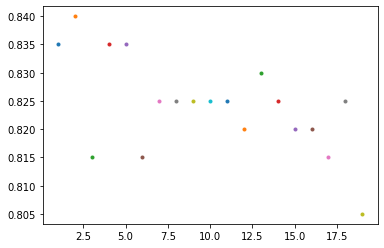

In [16]:
plt.figure()
for i in range(1,20):
    cl = PyPerClassifier()
    cl.fit(X1, y1, eta= 0.1, epochs = i)
    test = cl.accuracy(X2, y2)
    plt.plot(i, test, '.')
    print("Accuracy after {:2} epochs, test: {:6.3f}".format(
    i, test))
plt.show()

#### End of solution

### Exercise VII: Termination and Weights
- Extend the *PyPerClassifier()* with a method such that we can inspect the weights after training  is completed.
- Modify the *fit*-method of the classifier such that training halts when there are no more updates, and it is possible to inspect how many epochs it took.
- Run this on the five points film critics dataset. How many epochs does it take to reach completion?
- What are the final weights? Can you plot the decision border that corresponds to these weights together with the data set?

### Solution

In [12]:
class PyPerClassifier_6(PyClassifier):
    """Simple perceptron python classifier
    
    Stop on convergence.
    Three levels of tracing, trace = 1, 2 or 3."""
    
    def fit(self, X_train, y_train, eta=1, epochs=1,
                trace = False):
        X_train = [[1]+list(x) for x in X_train] # Put bias in position 0      
        self.dim = dim = len(X_train[0])
        self.weights = weights = [0 for _ in range(dim)]
        # Initialize all weights to 0. There are better ways!

        e = 0
        converged = False
        updated = 0
        while e < epochs and not converged:
            converged = True
            e += 1
            
            if trace >= 2:
                print("Epoch no: ", e)
                
            for x, t in zip(X_train, y_train):
                y = int(self.forward(x)>0)
                for i in range(dim):
                    weights[i] += eta * (t - y) * x[i]
                    
                if y != t: 
                    updated += 1
                    converged = False
                    
                if (trace == 2 and y != t) or trace == 3 :
                    print("x: {}, t: {}, y: {}  ".format(x,t,y), end=" ")
                    print("Weights:", end = " ")
                    for w in weights:
                        print("{:7.3f}, ".format(w), end = '')
                    print('')

        if trace:
            if converged:
                print("Training completed with convergence")
            else:
                print("Training completed without convergence")
            print("Number of epochs: {}, number of updates: {}". format(
                e, updated))
        
    def forward(self, x):
        score = sum([self.weights[i]*x[i] for i in range(self.dim)])
        return score       
    
    def predict(self, x):
        x = [1] + list(x)
        score = self.forward(x)
        return int(score > 0)

In [13]:
clf = PyPerClassifier_6()
clf.fit(X4, y4, epochs=100, trace=3)

Epoch no:  1
x: [1, 1, 1], t: 0, y: 0   Weights:   0.000,   0.000,   0.000, 
x: [1, 4, 3], t: 1, y: 0   Weights:   1.000,   4.000,   3.000, 
x: [1, 3, 5], t: 1, y: 1   Weights:   1.000,   4.000,   3.000, 
x: [1, 5, 6], t: 1, y: 1   Weights:   1.000,   4.000,   3.000, 
x: [1, 2, 3], t: 0, y: 1   Weights:   0.000,   2.000,   0.000, 
Epoch no:  2
x: [1, 1, 1], t: 0, y: 1   Weights:  -1.000,   1.000,  -1.000, 
x: [1, 4, 3], t: 1, y: 0   Weights:   0.000,   5.000,   2.000, 
x: [1, 3, 5], t: 1, y: 1   Weights:   0.000,   5.000,   2.000, 
x: [1, 5, 6], t: 1, y: 1   Weights:   0.000,   5.000,   2.000, 
x: [1, 2, 3], t: 0, y: 1   Weights:  -1.000,   3.000,  -1.000, 
Epoch no:  3
x: [1, 1, 1], t: 0, y: 1   Weights:  -2.000,   2.000,  -2.000, 
x: [1, 4, 3], t: 1, y: 0   Weights:  -1.000,   6.000,   1.000, 
x: [1, 3, 5], t: 1, y: 1   Weights:  -1.000,   6.000,   1.000, 
x: [1, 5, 6], t: 1, y: 1   Weights:  -1.000,   6.000,   1.000, 
x: [1, 2, 3], t: 0, y: 1   Weights:  -2.000,   4.000,  -2.000, 
E

Observe that the  decsion boundary is given by
$w_0x_0 + w_1x_1 + w_2x_2 = -6 + 6x_1 -2x_2=0$.
This can be refomulated as $x_2=3x_1 -3$.
Observe that one point, $(2,3)$ ends up at the decision boundary. 
The forward value at this point is $0$.
Hence the point is classified into class 0.

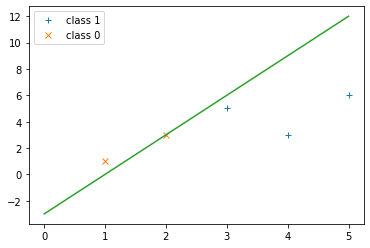

In [14]:
cl = {0:[], 1:[]}
for (a, b) in zip(X4, y4):
    cl[b].append(a)
plt.plot([a[0] for a in cl[1]], [a[1] for a in cl[1]], '+', label="class 1")
plt.plot([a[0] for a in cl[0]], [a[1] for a in cl[0]], 'x', label="class 0")
x1 = np.linspace(0, 5, 100)
x2 = 3*x1 - 3
plt.plot(x1, x2)
plt.legend()